In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [49]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [50]:
dftreinamento = pd.merge(dftreino, dflojas, on='Store', how='inner')
dfcompeticao = pd.merge(dfteste, dflojas, on='Store', how='inner')

In [53]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    else:
        return 4

dftreinamento['StateHoliday'] = dftreinamento['StateHoliday'].apply(lambda x: strToInt(x))
dftreinamento['StoreType'] = dftreinamento['StoreType'].apply(lambda x: strToInt(x))
dftreinamento['Assortment'] = dftreinamento['Assortment'].apply(lambda x: strToInt(x))

dfcompeticao['StateHoliday'] = dfcompeticao['StateHoliday'].apply(lambda x: strToInt(x))
dfcompeticao['StoreType'] = dfcompeticao['StoreType'].apply(lambda x: strToInt(x))
dfcompeticao['Assortment'] = dfcompeticao['Assortment'].apply(lambda x: strToInt(x))

dftreinamento['Date'] = pd.DatetimeIndex(pd.to_datetime(dftreinamento['Date']), dtype='datetime64[ns]').astype(np.int64)
dfcompeticao['Date'] = pd.DatetimeIndex(pd.to_datetime(dfcompeticao['Date']), dtype='datetime64[ns]').astype(np.int64)

def interval(x):
    if x == 'Feb,May,Aug,Nov':
        return 100
    elif x == 'Jan,Apr,Jul,Oct':
        return 101
    elif x == 'Mar,Jun,Sept,Dec':
        return 102
    else:
        return x

dftreinamento['PromoInterval'] = dftreinamento['PromoInterval'].apply(lambda x: interval(x))
dfcompeticao['PromoInterval'] = dfcompeticao['PromoInterval'].apply(lambda x: interval(x))

In [54]:
dfnotNAtreino = dftreinamento.dropna()
dfnotNAteste = dfcompeticao.dropna()

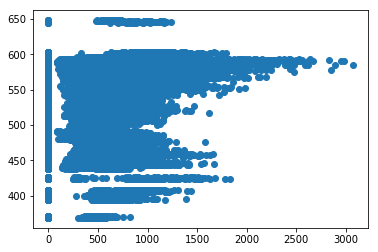

In [57]:
# Treinar modelo para encontrar os Customers do teste sem NA
X = dfnotNAtreino[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]
y = dfnotNAtreino['Customers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
plt.scatter(y_test, predict)

In [61]:
X_comp = dfnotNAteste[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]
predict_customers = lm.predict(X_comp)
dfnotNAteste['Customers'] = predict_customers
dfnotNAteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Customers
48,2,3,4,1442448000000000000,1.0,1,0,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,101.0,478.509634
49,858,3,3,1442361600000000000,1.0,1,0,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,101.0,478.505747
50,1714,3,2,1442275200000000000,1.0,1,0,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,101.0,478.501859
51,2570,3,1,1442188800000000000,1.0,1,0,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,101.0,478.497972
52,3426,3,7,1442102400000000000,0.0,0,0,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,101.0,478.496693


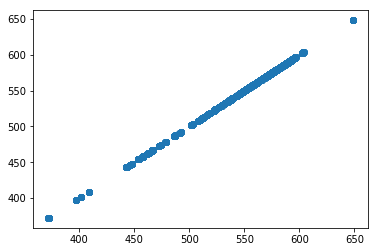

In [62]:
#Treinar modelo para encontrar os Customers do teste com NA
X = dfnotNAteste[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]
y = dfnotNAteste['Customers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
plt.scatter(y_test, predict)

In [63]:
dfcompeticao['Promo2SinceWeek'] = dfcompeticao['Promo2SinceWeek'].fillna(dfcompeticao['Promo2SinceWeek'].mean())
dfcompeticao['Promo2SinceYear'] = dfcompeticao['Promo2SinceYear'].fillna(dfcompeticao['Promo2SinceYear'].mean())
dfcompeticao['PromoInterval'] = dfcompeticao['PromoInterval'].fillna(dfcompeticao['PromoInterval'].mean())
dfcompeticao['CompetitionOpenSinceYear'] = dfcompeticao['CompetitionOpenSinceYear'].fillna(dfcompeticao['CompetitionOpenSinceYear'].mean())
dfcompeticao['CompetitionOpenSinceMonth'] = dfcompeticao['CompetitionOpenSinceMonth'].fillna(dfcompeticao['CompetitionOpenSinceMonth'].mean())
dfcompeticao['CompetitionDistance'] = dfcompeticao['CompetitionDistance'].fillna(dfcompeticao['CompetitionDistance'].mean())
dfcompeticao['Open'] = dfcompeticao['Open'].fillna(dfcompeticao['Open'].mean())

In [65]:
X_comp_na = dfcompeticao[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]
predict_customers_na = lm.predict(X_comp_na)
predict_customers_na
dfcompeticao['Customers'] = predict_customers_na
dfcompeticao.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Customers
0,1,1,4,1442448000000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,573.937949
1,857,1,3,1442361600000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,573.934051
2,1713,1,2,1442275200000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,573.930153
3,2569,1,1,1442188800000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,573.926256
4,3425,1,7,1442102400000000000,0.0,0,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,573.924973


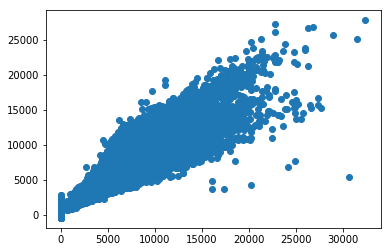

In [66]:
# Treinar modelo para encontrar os Sales do treino sem NA
X = dfnotNAtreino[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]
y = dfnotNAtreino['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
plt.scatter(y_test, predict)

In [68]:
dftreinamento['Promo2SinceWeek'] = dftreinamento['Promo2SinceWeek'].fillna(dftreinamento['Promo2SinceWeek'].mean())
dftreinamento['Promo2SinceYear'] = dftreinamento['Promo2SinceYear'].fillna(dftreinamento['Promo2SinceYear'].mean())
dftreinamento['PromoInterval'] = dftreinamento['PromoInterval'].fillna(dftreinamento['PromoInterval'].mean())
dftreinamento['CompetitionOpenSinceYear'] = dftreinamento['CompetitionOpenSinceYear'].fillna(dftreinamento['CompetitionOpenSinceYear'].mean())
dftreinamento['CompetitionOpenSinceMonth'] = dftreinamento['CompetitionOpenSinceMonth'].fillna(dftreinamento['CompetitionOpenSinceMonth'].mean())
dftreinamento['CompetitionDistance'] = dftreinamento['CompetitionDistance'].fillna(dftreinamento['CompetitionDistance'].mean())

In [72]:
X_comp_sales = dfcompeticao[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]
predict_comp_sales = lm.predict(X_comp_sales)
predict_comp_sales

array([5704.37171541, 5703.92667683, 5703.48163825, ..., 5575.81451215,
       5575.11580658, 5574.68005191])

In [73]:
dfpredict_comp_sales = pd.DataFrame(predict_comp_sales)
dfpredict_comp_sales.index = np.arange(1, len(dfpredict_comp_sales)+1)
dfpredict_comp_sales.count()
dfpredict_comp_sales.to_csv('submissionDroppingNA.csv')